In [24]:
import sys, os, re
sys.path.insert(0, "../../../iso-reconstruct-benchmark2/Isosceles_bmarking_routines")


In [56]:
import pylib.BenchmarkingRoutines
from importlib import reload
reload(pylib.BenchmarkingRoutines)
from pylib.BenchmarkingRoutines import *

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
include_strand_in_intronId=False

ref_gtf_file = "../reference_data/gencode.vM32.annotation_expressed.gtf"
ref_quant_file = "../reference_data/Mouse_isoseqsim_ground_truth_transcript_id_count.tsv"

i_ref_df = indexDfByIntronId(parseGTFtoIntronIDsandQuants(ref_gtf_file, ref_quant_file, include_strand_in_intronId=include_strand_in_intronId))
i_ref_df

-processGtf( ../reference_data/gencode.vM32.annotation_expressed.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


,transcript_ids,gene_ids,tpm
intronId,,,
"chr10:100283605-100284685:?,chr10:100284912-100286100:?,chr10:100286270-100287243:?,chr10:100287347-100292909:?,chr10:100293021-100294776:?,chr10:100294897-100296821:?,chr10:100296970-100301882:?,chr10:100302135-100307190:?,chr10:100307363-100307776:?,chr10:100307892-100310236:?,chr10:100310336-100312418:?,chr10:100312637-100313666:?,chr10:100313884-100323023:?",ENSMUST00000058154.15,ENSMUSG00000036676.15,72
"chr10:100284912-100286100:?,chr10:100286270-100287243:?,chr10:100287347-100292909:?,chr10:100293021-100294776:?,chr10:100294897-100296821:?,chr10:100296970-100301882:?,chr10:100302135-100307190:?,chr10:100307363-100307776:?,chr10:100307892-100310236:?,chr10:100310336-100312418:?,chr10:100312637-100313666:?,chr10:100313884-100323023:?",ENSMUST00000099318.10,ENSMUSG00000036676.15,1
"chr10:100313884-100320912:?,chr10:100321047-100323023:?",ENSMUST00000134477.2,ENSMUSG00000036676.15,27
"chr10:100323614-100324140:?,chr10:100324270-100324423:?,chr10:100324501-100325181:?,chr10:100325251-100326008:?,chr10:100326055-100328509:?,chr10:100328653-100330762:?,chr10:100330816-100331502:?,chr10:100331523-100331684:?,chr10:100331837-100332550:?,chr10:100332733-100333801:?,chr10:100333891-100334923:?,chr10:100335046-100336008:?,chr10:100336132-100336964:?,chr10:100337137-100344525:?,chr10:100344688-100346348:?,chr10:100346449-100346523:?,chr10:100346611-100348148:?,chr10:100348261-100349781:?,chr10:100349866-100350319:?,chr10:100350462-100350995:?,chr10:100351160-100352015:?,chr10:100352165-100353638:?,chr10:100353754-100354315:?,chr10:100354418-100354506:?,chr10:100354737-100359091:?,chr10:100359265-100364410:?,chr10:100364522-100365879:?,chr10:100366085-100366962:?,chr10:100367114-100372667:?,chr10:100372779-100373297:?,chr10:100373753-100374787:?,chr10:100374952-100375845:?,chr10:100375953-100376197:?,chr10:100376332-100377411:?,chr10:100377678-100378278:?,chr10:100378386-100379103:?,chr10:100379303-100380778:?,chr10:100380992-100382236:?,chr10:100382374-100384589:?,chr10:100384811-100385114:?,chr10:100385237-100387225:?,chr10:100387371-100387678:?,chr10:100387834-100390272:?,chr10:100390396-100393932:?,chr10:100394067-100395466:?,chr10:100395553-100397101:?,chr10:100397266-100397970:?,chr10:100398093-100399127:?,chr10:100399300-100402872:?,chr10:100403014-100403942:?,chr10:100404016-100404676:?,chr10:100404771-100407924:?,chr10:100408004-100408741:?",ENSMUST00000220346.2,ENSMUSG00000019971.11,7
"chr10:100324270-100324423:?,chr10:100324501-100325181:?,chr10:100325251-100326008:?,chr10:100326055-100328509:?,chr10:100328653-100330762:?,chr10:100330816-100331684:?,chr10:100331837-100332550:?,chr10:100332733-100333801:?,chr10:100333891-100334923:?,chr10:100335046-100336008:?,chr10:100336132-100336964:?,chr10:100337137-100344525:?,chr10:100344688-100346348:?,chr10:100346449-100346523:?,chr10:100346611-100348148:?,chr10:100348261-100349781:?,chr10:100349866-100350319:?,chr10:100350462-100350995:?,chr10:100351160-100352015:?,chr10:100352165-100353638:?,chr10:100353754-100354315:?,chr10:100354418-100354506:?,chr10:100354737-100359091:?,chr10:100359265-100364410:?,chr10:100364522-100365879:?,chr10:100366085-100366962:?,chr10:100367114-100372667:?,chr10:100372779-100373297:?,chr10:100373753-100374787:?,chr10:100374952-100375845:?,chr10:100375953-100376197:?,chr10:100376332-100377411:?,chr10:100377678-100378278:?,chr10:100378386-100379103:?,chr10:100379303-100380778:?,chr10:100380992-100382236:?,chr10:100382374-100384589:?,chr10:100384811-100385114:?,chr10:100385237-100387225:?,chr10:100387371-100387678:?,chr10:100387834-100390272:?,chr10:100390396-100393932:?,chr10:100394067-100395466:?,chr10:100395553-100397101:?,chr10:100397266-100397970:?,chr10:100398093-100399127:?,chr10:100399300-100402872:?,chr10:100403014-100403942:?,chr10:100404016-100404676:?,chr10:100404771-100407924:?,chr10:100408004-100408741:?",ENSMUST00000219765.2,ENSMUSG00000019971.11,5
...,...,...,...
"chrY:90797248-90804564:?,chrY:90804

In [28]:
i_ref_df["tpm"] = i_ref_df["tpm"] / i_ref_df["tpm"].sum() * 1e6

In [29]:
downsampled_gtf = "../reference_data/gencode.vM32.annotation_1isoformPerGene_expressed_kept.gtf"
i_downsampled_gtf_df = indexDfByIntronId(parseGTFtoIntronIDs(downsampled_gtf, include_strand=include_strand_in_intronId))
i_downsampled_gtf_df['downsampled_kept'] = True


-processGtf( ../reference_data/gencode.vM32.annotation_1isoformPerGene_expressed_kept.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


In [30]:
i_ref_df = i_ref_df.join(i_downsampled_gtf_df['downsampled_kept'])
i_ref_df.fillna(False, inplace=True)

In [31]:
i_ref_df.head()

,transcript_ids,gene_ids,tpm,downsampled_kept
intronId,,,,
"chr10:100283605-100284685:?,chr10:100284912-100286100:?,chr10:100286270-100287243:?,chr10:100287347-100292909:?,chr10:100293021-100294776:?,chr10:100294897-100296821:?,chr10:100296970-100301882:?,chr10:100302135-100307190:?,chr10:100307363-100307776:?,chr10:100307892-100310236:?,chr10:100310336-100312418:?,chr10:100312637-100313666:?,chr10:100313884-100323023:?",ENSMUST00000058154.15,ENSMUSG00000036676.15,4.198425,False
"chr10:100284912-100286100:?,chr10:100286270-100287243:?,chr10:100287347-100292909:?,chr10:100293021-100294776:?,chr10:100294897-100296821:?,chr10:100296970-100301882:?,chr10:100302135-100307190:?,chr10:100307363-100307776:?,chr10:100307892-100310236:?,chr10:100310336-100312418:?,chr10:100312637-100313666:?,chr10:100313884-100323023:?",ENSMUST00000099318.10,ENSMUSG00000036676.15,0.058311,True
"chr10:100313884-100320912:?,chr10:100321047-100323023:?",ENSMUST00000134477.2,ENSMUSG00000036676.15,1.574409,False
"chr10:100323614-100324140:?,chr10:100324270-100324423:?,chr10:100324501-100325181:?,chr10:100325251-100326008:?,chr10:100326055-100328509:?,chr10:100328653-100330762:?,chr10:100330816-100331502:?,chr10:100331523-100331684:?,chr10:100331837-100332550:?,chr10:100332733-100333801:?,chr10:100333891-100334923:?,chr10:100335046-100336008:?,chr10:100336132-100336964:?,chr10:100337137-100344525:?,chr10:100344688-100346348:?,chr10:100346449-100346523:?,chr10:100346611-100348148:?,chr10:100348261-100349781:?,chr10:100349866-100350319:?,chr10:100350462-100350995:?,chr10:100351160-100352015:?,chr10:100352165-100353638:?,chr10:100353754-100354315:?,chr10:100354418-100354506:?,chr10:100354737-100359091:?,chr10:100359265-100364410:?,chr10:100364522-100365879:?,chr10:100366085-100366962:?,chr10:100367114-100372667:?,chr10:100372779-100373297:?,chr10:100373753-100374787:?,chr10:100374952-100375845:?,chr10:100375953-100376197:?,chr10:100376332-100377411:?,chr10:100377678-100378278:?,chr10:100378386-100379103:?,chr10:100379303-100380778:?,chr10:100380992-100382236:?,chr10:100382374-100384589:?,chr10:100384811-100385114:?,chr10:100385237-100387225:?,chr10:100387371-100387678:?,chr10:100387834-100390272:?,chr10:100390396-100393932:?,chr10:100394067-100395466:?,chr10:100395553-100397101:?,chr10:100397266-100397970:?,chr10:100398093-100399127:?,chr10:100399300-100402872:?,chr10:100403014-100403942:?,chr10:100404016-100404676:?,chr10:100404771-100407924:?,chr10:100408004-100408741:?",ENSMUST00000220346.2,ENSMUSG00000019971.11,0.408180,False
"chr10:100324270-100324423:?,chr10:100324501-100325181:?,chr10:100325251-100326008:?,chr10:100326055-100328509:?,chr10:100328653-100330762:?,chr10:100330816-100331684:?,chr10:100331837-100332550:?,chr10:100332733-100333801:?,chr10:100333891-100334923:?,chr10:100335046-100336008:?,chr10:100336132-100336964:?,chr10:100337137-100344525:?,chr10:100344688-100346348:?,chr10:100346449-100346523:?,chr10:100346611-100348148:?,chr10:100348261-100349781:?,chr10:100349866-100350319:?,chr10:100350462-100350995:?,chr10:100351160-100352015:?,chr10:100352165-100353638:?,chr10:100353754-100354315:?,chr10:100354418-100354506:?,chr10:100354737-100359091:?,chr10:100359265-100364410:?,chr10:100364522-100365879:?,chr10:100366085-100366962:?,chr10:100367114-100372667:?,chr10:100372779-100373297:?,chr10:100373753-100374787:?,chr10:100374952-100375845:?,chr10:100375953-100376197:?,chr10:100376332-100377411:?,chr10:100377678-100378278:?,chr10:100378386-100379103:?,chr10:100379303-100380778:?,chr10:100380992-100382236:?,chr10:100382374-100384589:?,chr10:100384811-100385114:?,chr10:100385237-100387225:?,chr10:100387371-100387678:?,chr10:100387834-100390272:?,chr10:100390396-100393932:?,chr10:100394067-100395466:?,chr10:100395553-100397101:?,chr10:100397266-100397970:?,chr10:100398093-100399127:?,chr10:100399300-100402872:?,chr10:100403014-100403942:?,chr10:100404016-100404676:?,chr10:100404771-100407924:?,chr10:100408004-100408741:?",ENSMUST00000219765.2,ENSMUSG00

In [32]:
i_ref_df.copy().reset_index().to_csv("refDf.intron_ids_and_expression.tsv", sep="\t", index=False)

In [60]:

set_color_palette("FLAMES", "gainsboro", "solid")
set_color_palette("IsoQuant", "blue", "solid")
set_color_palette("IsoSeq", "orchid", "solid")
set_color_palette("LRAA", "teal", "solid")
set_color_palette("Mandalorion", "lightblue", "solid")
set_color_palette("bambu", "forestgreen", "solid")
set_color_palette("flair", "pink", "solid")
set_color_palette("isosceles", "red", "solid")
set_color_palette("stringtie", "aquamarine", "solid")
set_color_palette("talon", "orange", "solid")


In [34]:
downsampled_quant_files_dir = "processed_prog_results"
downsampled_gtf_files_dir =  "raw_prog_results"

prog_quant_files = {    
    
    "FLAMES" : ["mouse_isoseqsim_e000.FLAMES.gtf", "FLAMES.tsv"],
    "IsoQuant" : ["mouse_isoseqsim_e000.IsoQuant.gtf", "IsoQuant.tsv"],
    "IsoSeq" : ["mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff", "IsoSeq.tsv"],
    "LRAA" : ["mouse_isoseqsim_e000.LRAA.gtf", "LRAA.tsv"],
    "Mandalorion" : ["mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf", "Mandalorion.tsv"],
    "bambu" : ["mouse_isoseqsim_e000.Ref-Guided.bambu.gtf", "bambu.tsv"],
    "flair" : ["mouse_isoseqsim_e000.flair.gtf", "flair.tsv"],
    "isosceles" : ["mouse_isoseqsim_e000.isosceles.refguided_novel_ID.gtf", "isosceles.tsv"],
    "stringtie" : ["mouse_isoseqsim_e000.ref-guided.stringtie.gtf", "stringtie.tsv"],
    "talon" : ["mouse_isoseqsim_e000_talon.gtf", "talon.tsv"] }
    
downsampled_dict = {}
for progname, (gtf_fname, tsv_fname) in prog_quant_files.items():
    gtf_fname = os.path.join(downsampled_gtf_files_dir, gtf_fname)
    tsv_fname = os.path.join(downsampled_quant_files_dir, tsv_fname)
    
    print(progname, gtf_fname, tsv_fname)
    downsampled_dict[progname] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf_fname, tsv_fname, include_strand_in_intronId=include_strand_in_intronId))
    

FLAMES raw_prog_results/mouse_isoseqsim_e000.FLAMES.gtf processed_prog_results/FLAMES.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.FLAMES.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id']


IsoQuant raw_prog_results/mouse_isoseqsim_e000.IsoQuant.gtf processed_prog_results/IsoQuant.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.IsoQuant.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcripts', 'gene_type', 'gene_name', 'mgi_id', 'havana_gene', 'transcript_id', 'exons', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


IsoSeq raw_prog_results/mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff processed_prog_results/IsoSeq.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


LRAA raw_prog_results/mouse_isoseqsim_e000.LRAA.gtf processed_prog_results/LRAA.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.LRAA.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


Mandalorion raw_prog_results/mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf processed_prog_results/Mandalorion.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id', 'gene_name']


bambu raw_prog_results/mouse_isoseqsim_e000.Ref-Guided.bambu.gtf processed_prog_results/bambu.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.Ref-Guided.bambu.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


flair raw_prog_results/mouse_isoseqsim_e000.flair.gtf processed_prog_results/flair.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.flair.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


isosceles raw_prog_results/mouse_isoseqsim_e000.isosceles.refguided_novel_ID.gtf processed_prog_results/isosceles.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.isosceles.refguided_novel_ID.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


stringtie raw_prog_results/mouse_isoseqsim_e000.ref-guided.stringtie.gtf processed_prog_results/stringtie.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000.ref-guided.stringtie.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'cov', 'FPKM', 'TPM', 'exon_number', 'reference_id', 'ref_gene_id', 'ref_gene_name']


talon raw_prog_results/mouse_isoseqsim_e000_talon.gtf processed_prog_results/talon.tsv
-processGtf( raw_prog_results/mouse_isoseqsim_e000_talon.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_status', 'gene_type', 'talon_gene', 'havana_gene', 'level', 'mgi_id', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'talon_transcript', 'havana_transcript', 'source', 'tag', 'transcript_support_level', 'exon_number', 'exon_id', 'talon_exon', 'exon_status', 'ont', 'ccdsid', 'protein_id', 'NNC_transcript', 'NIC_transcript', 'ISM-prefix_to_IDs', 'ISM-prefix_transcript', 'ISM_to_IDs', 'ISM_transcript', 'ISM-suffix_to_IDs', 'ISM-suffix_transcript', 'intergenic_novel', 'intergenic_transcript', 'antisense_gene', 'gene_antisense_to_IDs', 'antisense_transcript']


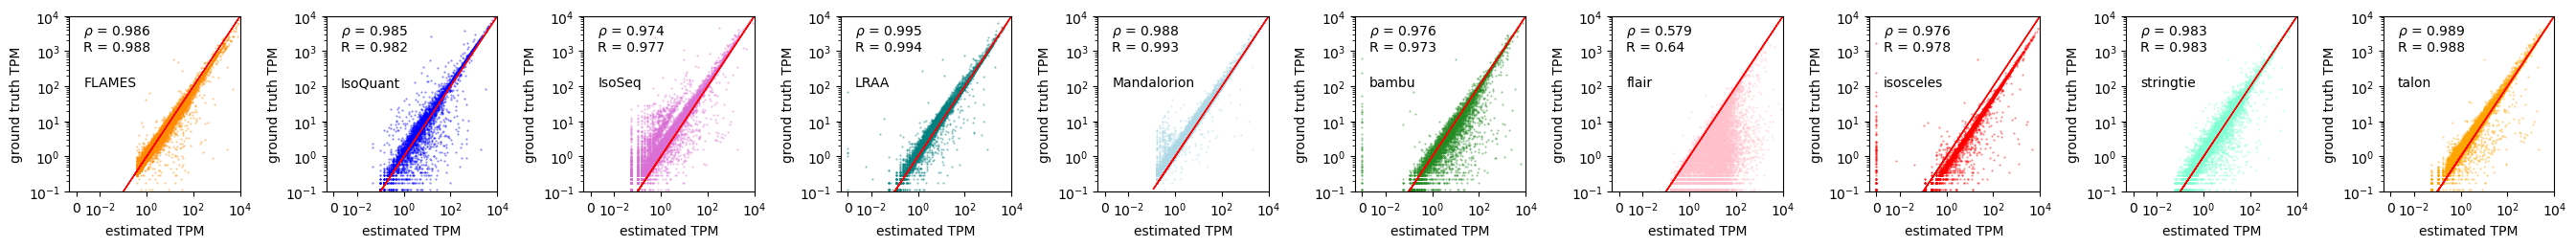

In [35]:
scatterplot_adj(i_ref_df, downsampled_dict)

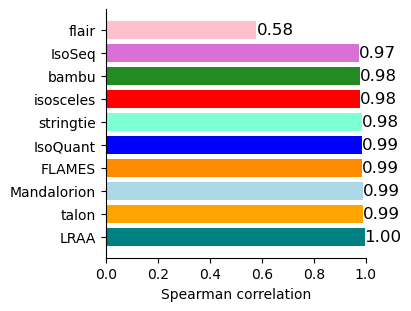

In [36]:
cor_spearman_barplot(i_ref_df, downsampled_dict)

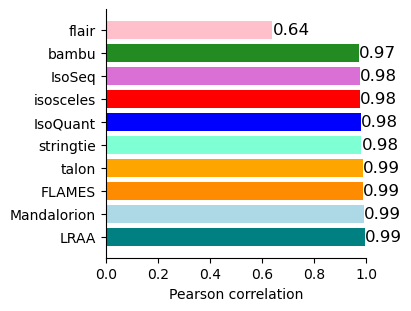

In [37]:
cor_pearson_barplot(i_ref_df, downsampled_dict)

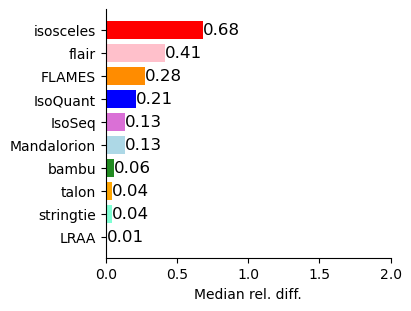

In [38]:
rel_diff_barplot(i_ref_df, downsampled_dict, 'median')

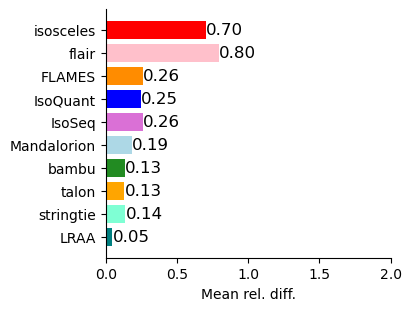

In [39]:
rel_diff_barplot(i_ref_df, downsampled_dict, 'mean')

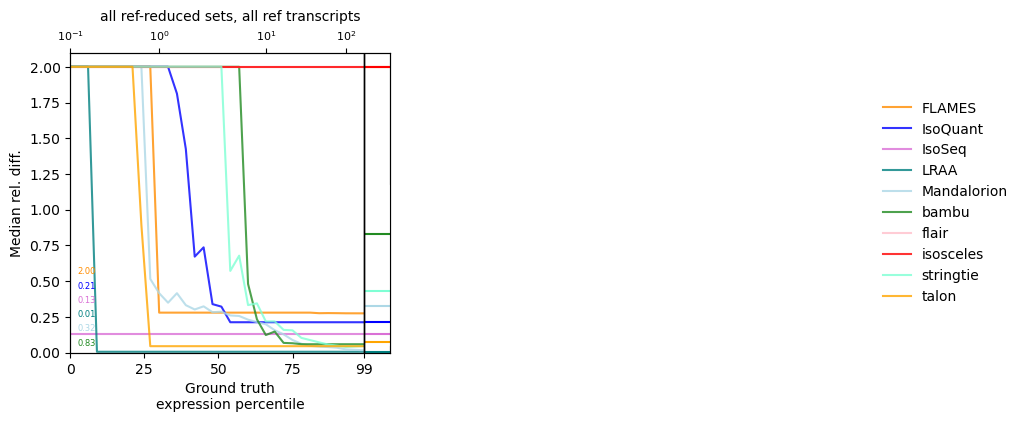

In [40]:
rel_diff_vs_expr_percentile_plot(i_ref_df, downsampled_dict, 33, 'median',
                                 'all ref-reduced sets, all ref transcripts')

In [41]:
downsampled_kept_intron_ids = i_ref_df[i_ref_df['downsampled_kept'] == False].index

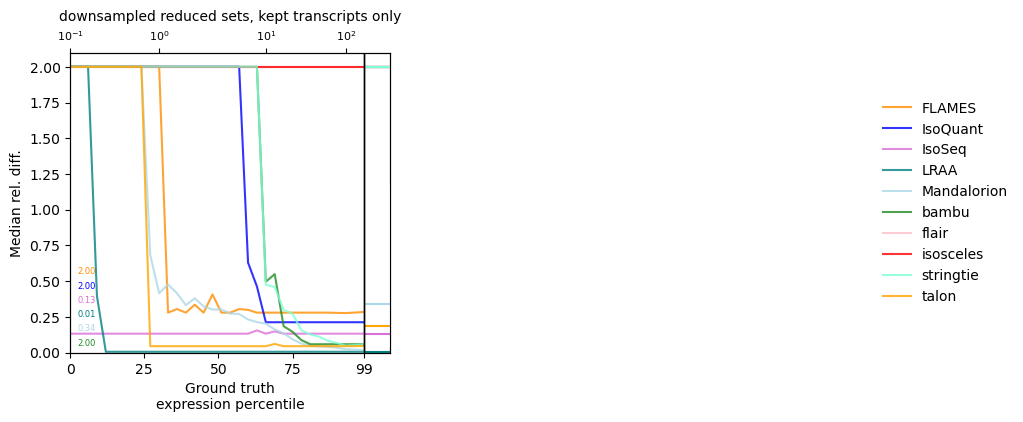

In [42]:
rel_diff_vs_expr_percentile_plot(i_ref_df, downsampled_dict, 33, 'median', 
                                 'downsampled reduced sets, kept transcripts only', 
                                intron_ids_use = downsampled_kept_intron_ids)

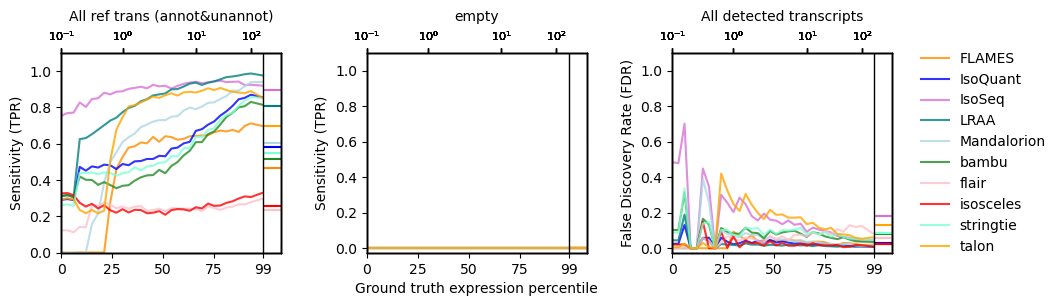

In [43]:
IsoformIdentificationSensitivityPlot(i_ref_df, downsampled_dict, 33, 'median', 'downsampled set')

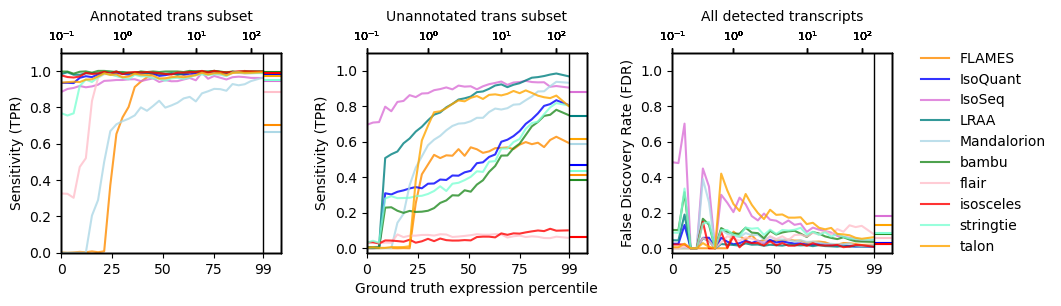

In [44]:
IsoformIdentificationSensitivityPlot(i_ref_df, downsampled_dict, 33, 'median', 'downsampled set', downsampled_kept_intron_ids)

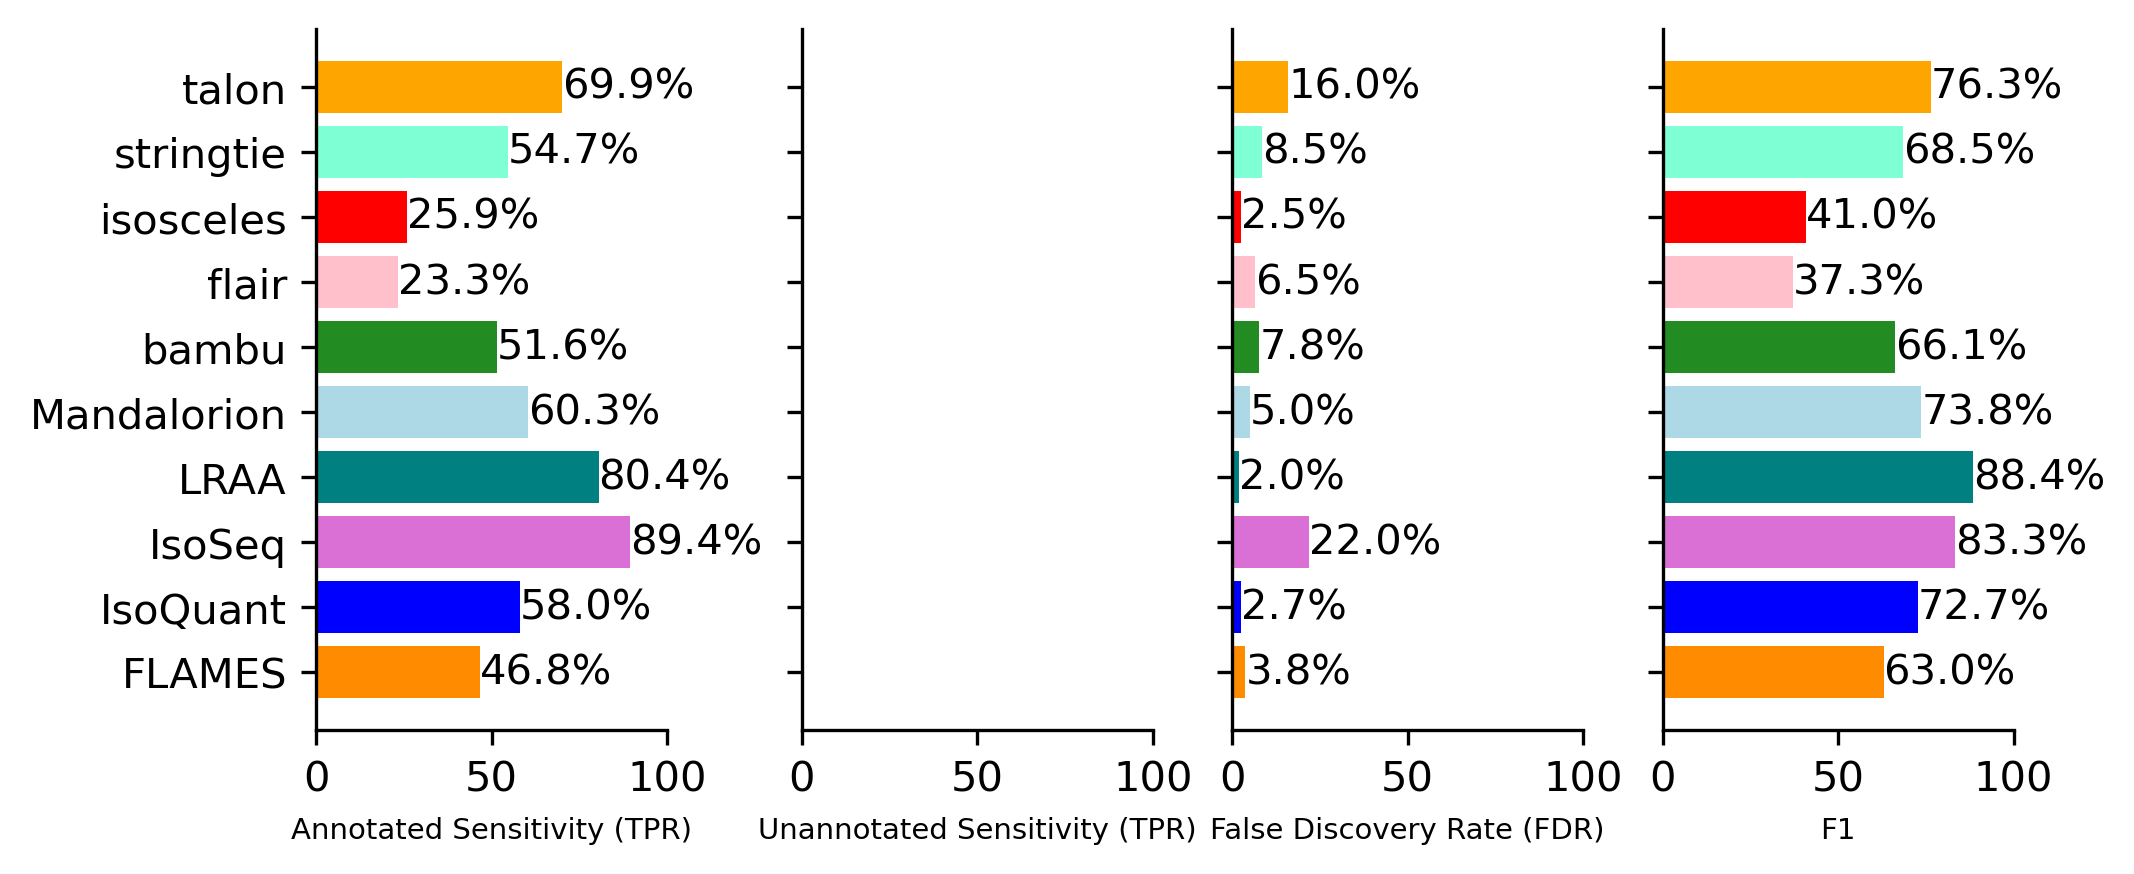

In [59]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, downsampled_dict)

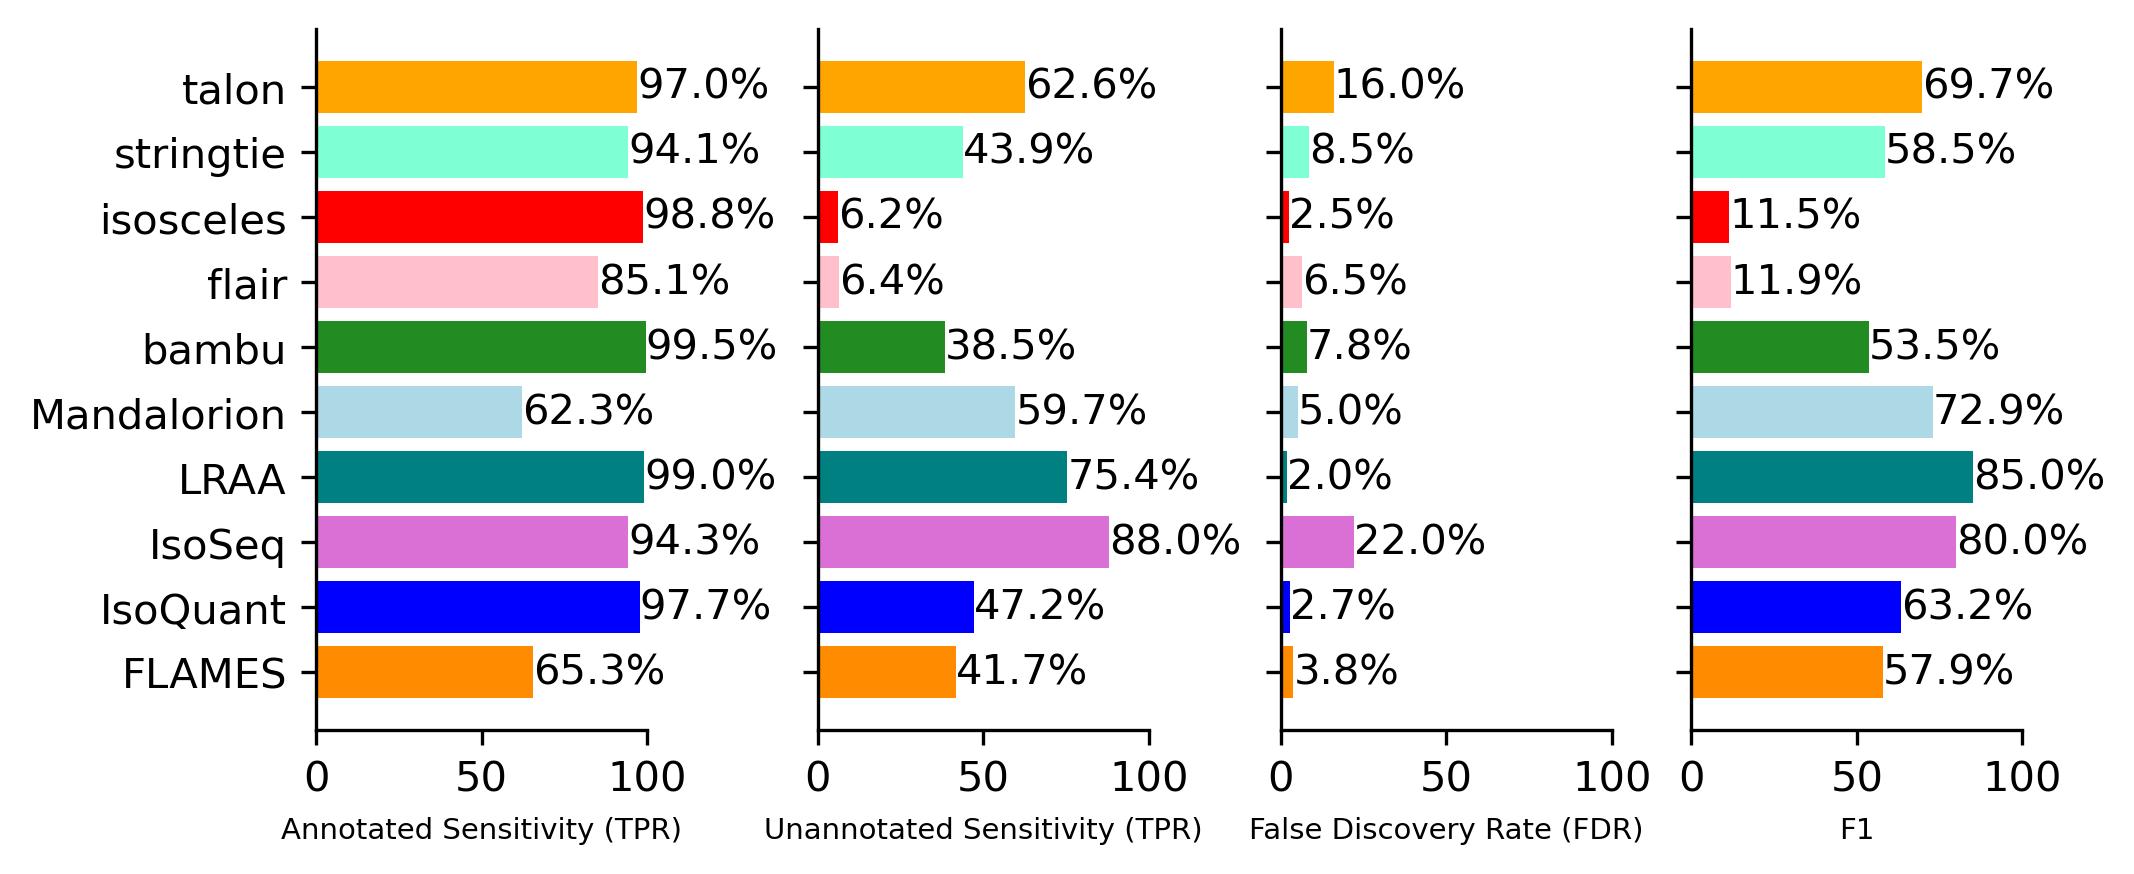

In [58]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, downsampled_dict, downsampled_kept_intron_ids)

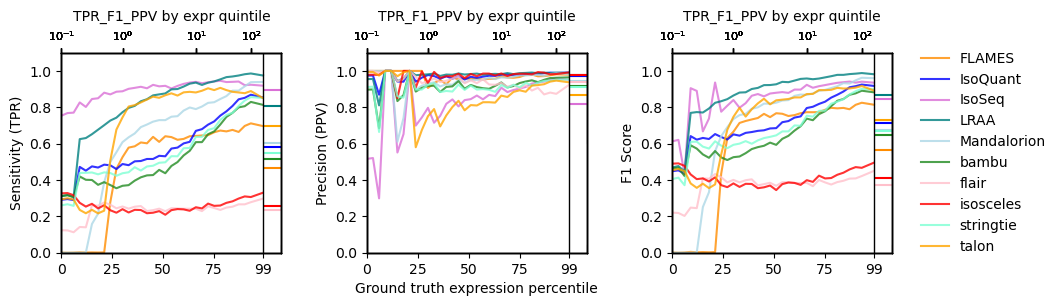

In [54]:
TPR_F1_PPV_plot(i_ref_df, downsampled_dict)

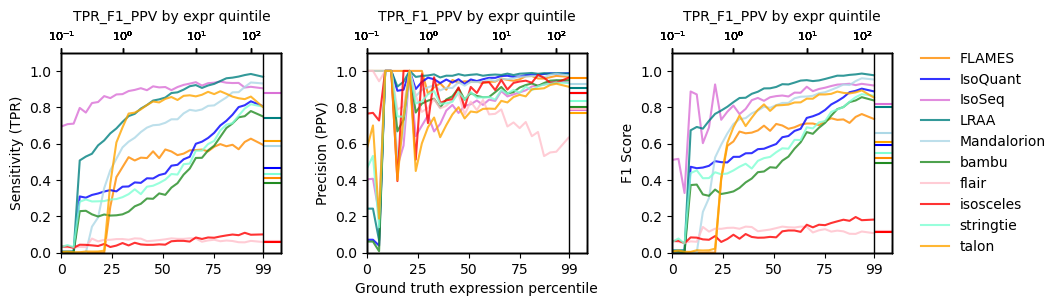

In [55]:
TPR_F1_PPV_plot(i_ref_df, downsampled_dict, novel_intron_ids=downsampled_kept_intron_ids)